In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import sklearn

In [2]:
df=pd.read_csv('housing1.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
from sklearn.model_selection import train_test_split
X=df.drop('median_house_value', axis=1)
y=df['median_house_value']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [9]:
train_df=X_train.join(y_train)

In [10]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9230,-120.11,36.96,17,3344,570.0,1624,536,3.8952,INLAND,95300
1176,-121.55,39.50,26,3215,827.0,2041,737,1.0585,INLAND,45100
18382,-121.83,37.23,7,5389,903.0,2232,825,6.6659,<1H OCEAN,500001
12044,-117.51,33.89,16,5418,1005.0,2690,1088,4.0556,INLAND,158000
6354,-117.96,34.14,27,2221,542.0,1328,523,2.5275,INLAND,151700
...,...,...,...,...,...,...,...,...,...,...
10241,-117.88,33.89,17,3218,923.0,1701,824,3.6946,<1H OCEAN,265500
12630,-121.50,38.49,29,3606,690.0,2317,696,2.7368,INLAND,78200
18927,-122.20,38.10,5,9567,1729.0,4620,1580,4.4821,NEAR BAY,210000
8484,-118.30,33.92,34,2053,382.0,1258,380,3.0139,<1H OCEAN,154700


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

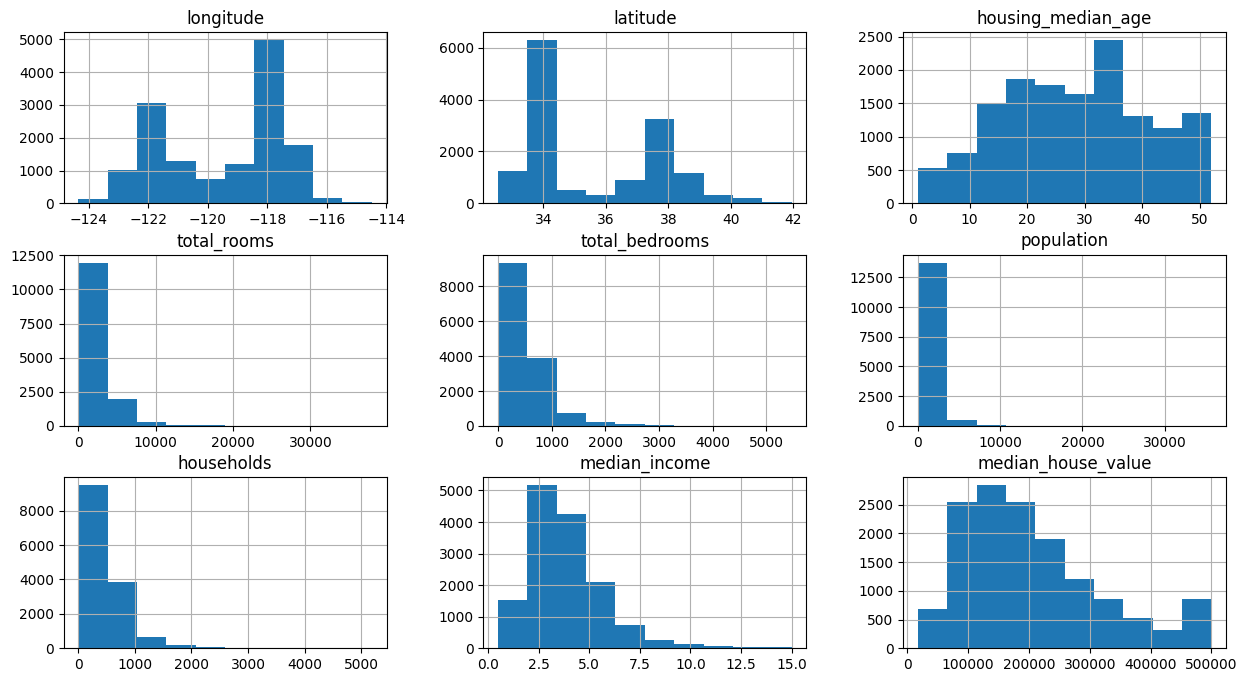

In [11]:
train_df.hist(figsize=(15,8))


In [12]:
train_df1=train_df.drop('ocean_proximity',axis=1)
train_df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9230,-120.11,36.96,17,3344,570.0,1624,536,3.8952,95300
1176,-121.55,39.50,26,3215,827.0,2041,737,1.0585,45100
18382,-121.83,37.23,7,5389,903.0,2232,825,6.6659,500001
12044,-117.51,33.89,16,5418,1005.0,2690,1088,4.0556,158000
6354,-117.96,34.14,27,2221,542.0,1328,523,2.5275,151700


In [13]:
train_df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924445,-0.108979,0.048556,0.070361,0.102731,0.058033,-0.016964,-0.044768
latitude,-0.924445,1.000000,0.010695,-0.038672,-0.067089,-0.111194,-0.072291,-0.079092,-0.145513
housing_median_age,-0.108979,0.010695,1.000000,-0.362033,-0.320951,-0.298791,-0.303122,-0.123308,0.110767
total_rooms,0.048556,-0.038672,-0.362033,1.000000,0.930418,0.855766,0.919290,0.206311,0.135657
total_bedrooms,0.070361,-0.067089,-0.320951,0.930418,1.000000,0.875782,0.979847,0.000366,0.053956
population,0.102731,-0.111194,-0.298791,0.855766,0.875782,1.000000,0.905302,0.011111,-0.023427
households,0.058033,-0.072291,-0.303122,0.919290,0.979847,0.905302,1.000000,0.021232,0.067831
median_income,-0.016964,-0.079092,-0.123308,0.206311,0.000366,0.011111,0.021232,1.000000,0.682823
median_house_value,-0.044768,-0.145513,0.110767,0.135657,0.053956,-0.023427,0.067831,0.682823,1.000000


<Axes: >

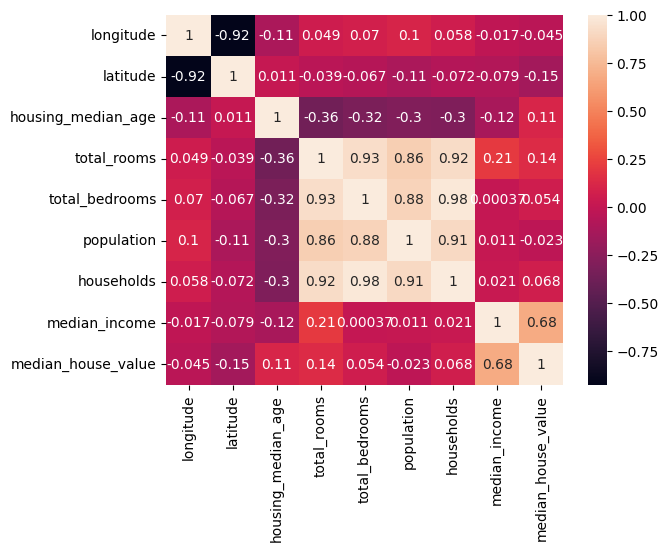

In [14]:
sns.heatmap(train_df1.corr(),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

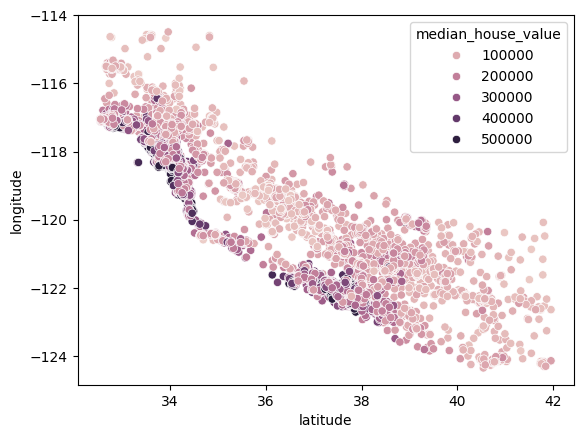

In [15]:
sns.scatterplot(x='latitude', y='longitude',data=train_df1,hue='median_house_value')

In [16]:
from sklearn.linear_model import LinearRegression
X=train_df1.drop('median_house_value', axis=1)
y=train_df1['median_house_value']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,y_train)
model.fit(X_test,y_test)

LinearRegression()

In [20]:
model.score(X_test,y_test)

0.6378492160579441

In [21]:
#Predict on test set
y_pred=model.predict(X_test)

In [22]:
#Predict Values
print(y_pred)

[136303.70798225 319139.25109857 167018.57237255 ... 201605.07225044
 113305.76729863 166924.78597598]


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [27]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

In [28]:
print(y_pred_rf)

[ 77945.   421559.19 134996.   ... 179548.   140268.   138979.01]


In [34]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor R² Score: {r2_rf:.4f}")

Random Forest Regressor R² Score: -0.8384


In [30]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

In [31]:
print(y_pred_xgb)

[274658.4   83946.71  82299.7  ... 109142.16 263078.97 197851.42]


In [33]:
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor R² Score: {r2_xgb:.4f}")

XGBoost Regressor R² Score: 0.8338
